# Python/Kerasで深層学習：MNISTをMLPで学習

https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py

In [2]:
import os
print(os.getcwd())
os.chdir('C:/Users/jtcuser/DeepLearning/') # Windowsの場合

C:\Users\jtcuser\DeepLearning


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3  
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist  # MNIST data is expected
from keras.models import Sequential, Model # Sequential
from keras.layers import Input, Dense, Dropout # Input, Dense (FC) and Dropout
from keras.optimizers import RMSprop # RMSprop will be used for optimization

num_classes = 10 # クラス数

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28*28) # 28x28の画像を784次元のベクトルに変換
x_test = x_test.reshape(x_test.shape[0], 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], '訓練データ数')
print(x_test.shape[0], 'テストデータ数')


11493376/11490434 [==============================] - 7s 1us/step
60000 訓練データ数
10000 テストデータ数


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(28*28,))
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=[predictions] )

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


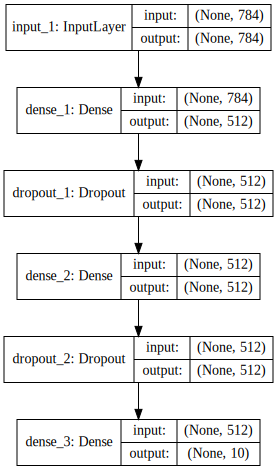

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='images/PYTHON-MNIST-MLP.jpg')

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))


In [7]:
batch_size = 128 # バッチサイズ
epochs = 30 # エポック

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.2439 - acc: 0.9247 - val_loss: 0.1141 - val_acc: 0.9650
Epoch 2/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.1030 - acc: 0.9692 - val_loss: 0.0808 - val_acc: 0.9752
Epoch 3/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.0754 - acc: 0.9772 - val_loss: 0.0889 - val_acc: 0.9750
Epoch 4/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0610 - acc: 0.9815 - val_loss: 0.0697 - val_acc: 0.9798
Epoch 5/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.0505 - acc: 0.9848 - val_loss: 0.0757 - val_acc: 0.9814
Epoch 6/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.0448 - acc: 0.9868 - val_loss: 0.0708 - val_acc: 0.9816
Epoch 7/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.0381 - acc: 0.9886 - val_loss: 0.0719 - 

In [8]:
# HDF5ファイルでモデル全体とモデルの重みを保存
model.save("h5/PYTHON-MNIST-MLP.h5")
model.save_weights("h5/PYTHON-MNIST-MLP-weights.h5")

In [9]:
# pickleで訓練のヒストリーを保存
import pickle
with open('pkl/PYTHON-MNIST-MLP.pkl', 'wb') as h_file:
    pickle.dump(history.history, h_file)

In [10]:
pred = model.predict(x_test)

# 結果を表示
print("予測:\n", pred)

予測:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.2163669e-32]
 [0.0000000e+00 1.4319422e-30 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.9201121e-36 1.0000000e+00 7.5550354e-20 ... 6.4148484e-16
  2.9684944e-22 2.4348704e-28]
 ...
 [0.0000000e+00 4.3071624e-34 0.0000000e+00 ... 9.7499145e-25
  7.8557140e-30 1.7009717e-24]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.7143801e-29 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('テストデータの損失:', score[0])
print('テストデータの精度:', score[1])

テストデータの損失: 0.12448697736722998
テストデータの精度: 0.9854


In [12]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


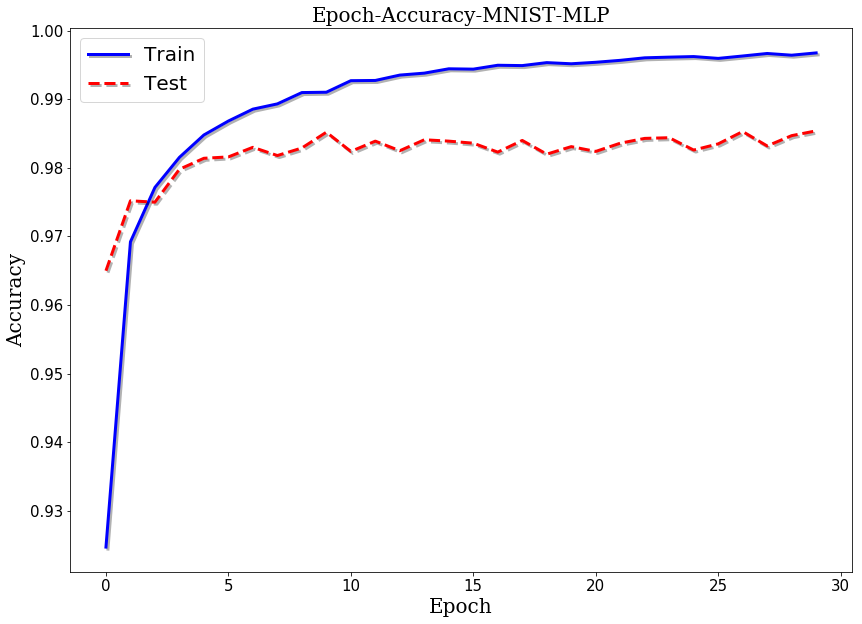

In [13]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-MNIST-MLP',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('pdf/Epoch-Accuracy-MNIST-MLP.pdf')
plt.show()


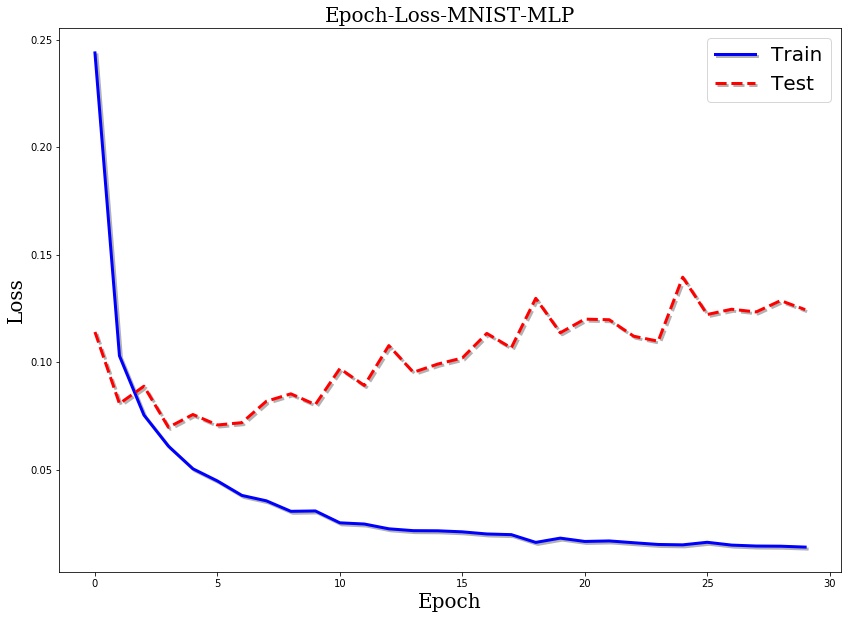

In [14]:
# 損失グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['loss'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_loss'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.title('Epoch-Loss-MNIST-MLP',fontsize=25,font_properties=fp2)
plt.ylabel('Loss',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)
plt.savefig('pdf/Epoch-Loss-MNIST-MLP.pdf')
plt.show()

In [15]:
# list all data in history
print(history.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [16]:
# 未知データのクラスの予測
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


[7 2 1 ... 4 5 6]


In [17]:
# 混合行列の描画関数の定義
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

Confusion matrix, without normalization
[[ 973    0    3    0    0    2    3    0    0    0]
 [   1 1130    0    0    0    0    2    1    0    2]
 [   0    1 1015    2    1    0    0    5    1    0]
 [   2    0    2  992    0    6    1    0    2    2]
 [   0    0    2    0  969    0    5    0    2   13]
 [   1    1    0    1    0  878    4    0    4    1]
 [   1    2    1    0    5    2  940    0    3    0]
 [   1    0    6    6    2    0    0 1018    3    5]
 [   1    1    3    3    0    2    3    2  955    2]
 [   0    0    0    6    5    2    0    2    4  984]]


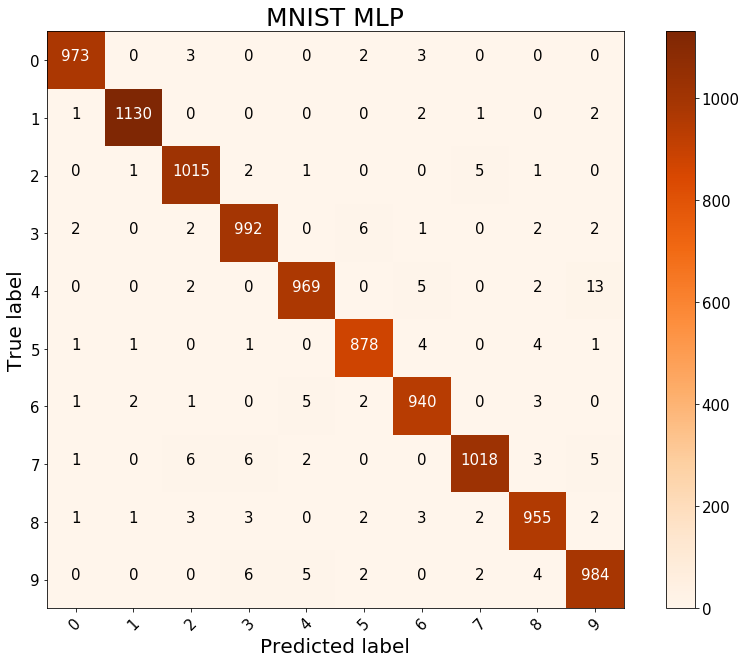

In [19]:
from sklearn.metrics import confusion_matrix # 混合行列
actual = np.argmax(y_test, axis=1)
cm = confusion_matrix(pred_classes, actual)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, classes=classes, title='MNIST MLP')
plt.show()


In [20]:
count = 0
total = actual.shape[0]
for i in range(total):
    if actual[i] == pred_classes[i]:
        count += 1
accuracy = float(count)/total
print("分類精度 = ",accuracy)

分類精度 =  0.9854
